In [6]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import lib
import myPlot
import neuron
from AP_VGCC_dynamics import AP
import utils
import pickle

In [ ]:
importlib.reload(myPlot)
importlib.reload(lib)
importlib.reload(neuron)
np.seterr(all='raise', under="warn")

SIMULATION_TIME = 40
TIME_STEP = 0.1e-3 #s
time_window_plot = 0, 20 #s

ap_obj = AP.Spike(
    total_width=4e-3,
    t_peak=0.5e-3,
    t_under=2e-3,
    v_thresh=-34.3e-3,
    v_rest=-65e-3,
    v_peak=40e-3,
    v_under=-74.4-3
)

properties = neuron.Properties(
    ap=ap_obj,
    membrane_tau = 20e-3,
    C = 1e-6, #F/cm^2
    t_ref_s = 2e-3, # absolute refractory period after one AP
    t_ref_v = 6.3e-3, # absolute refractory period of release vesicle machinery
    LTP_active = True,   # set to False to inactivate astrocytic feedback
    STD_active = True,
    N_v_max = 10,
    glutamate_clearance_time=2e-3
)

simulation_parameters = neuron.SimulationParameters(
    time_step = TIME_STEP,
    simulation_time = SIMULATION_TIME,
    temperature = 310, #K
    init_25s = False,
    init_N = 0,
    #DiffEq=False,
    current_type = "fixed_rate",
    current_amplitude = 4.5e-6,
    f_current = 100, #Hz
    N_iterations = 1
)
axonal_noise = {
        "active": False,
        "base_delay": 0.002,
        "jitter": 0.0006,
        "base_amp": 0.9,
        "amp_CV": 0.1,
        "AP_width_CV": 0.06
    }

noise = neuron.Noise(
    thermal = False,
    axonal = axonal_noise,
    escape = True,
    spontaneous_release = True,
    h_init_random = False,
    VGCC = False,
    Astro=False,
    astro_release_rate=1
)

my_neuron = neuron.Simulator(properties, simulation_parameters, noise)

track_variables= ["Ca_Astro", "Ca_stored","u", "S", "IP3", "h"]
"""["u_pre", "S_pre", "u", "S", "release_vector", "Ca_Astro", "mutual_information", "Ca_pre", "open_prob", "release_prob",
                  "N_v", "release_prob_a_posteriori"]
 ["u_pre", "u", "spike_rate", "spike_probability", "open_prob", "S_pre", "S", "release_rate", "release_vector",
 "N_v", "release_prob", "release_prob_a_posteriori", "ap_duration_count", "Ca_pre", "Ca_Astro" ,"Ca_stored", 
 "site_probabilities", "glu", "IP3", "h", "mutual_information", "ap_active_prob", "spike_probability_a_priori", "ap_ready_prob"]"""
#CAMBIARE NOME
results = my_neuron.simulate(track_variables, save=True, save_each=1, name="provaAstroVariables")
myPlot.drawFigure(SIMULATION_TIME, TIME_STEP, results, n_drawings=len(track_variables))

#print(np.mean(results.open_prob.value))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


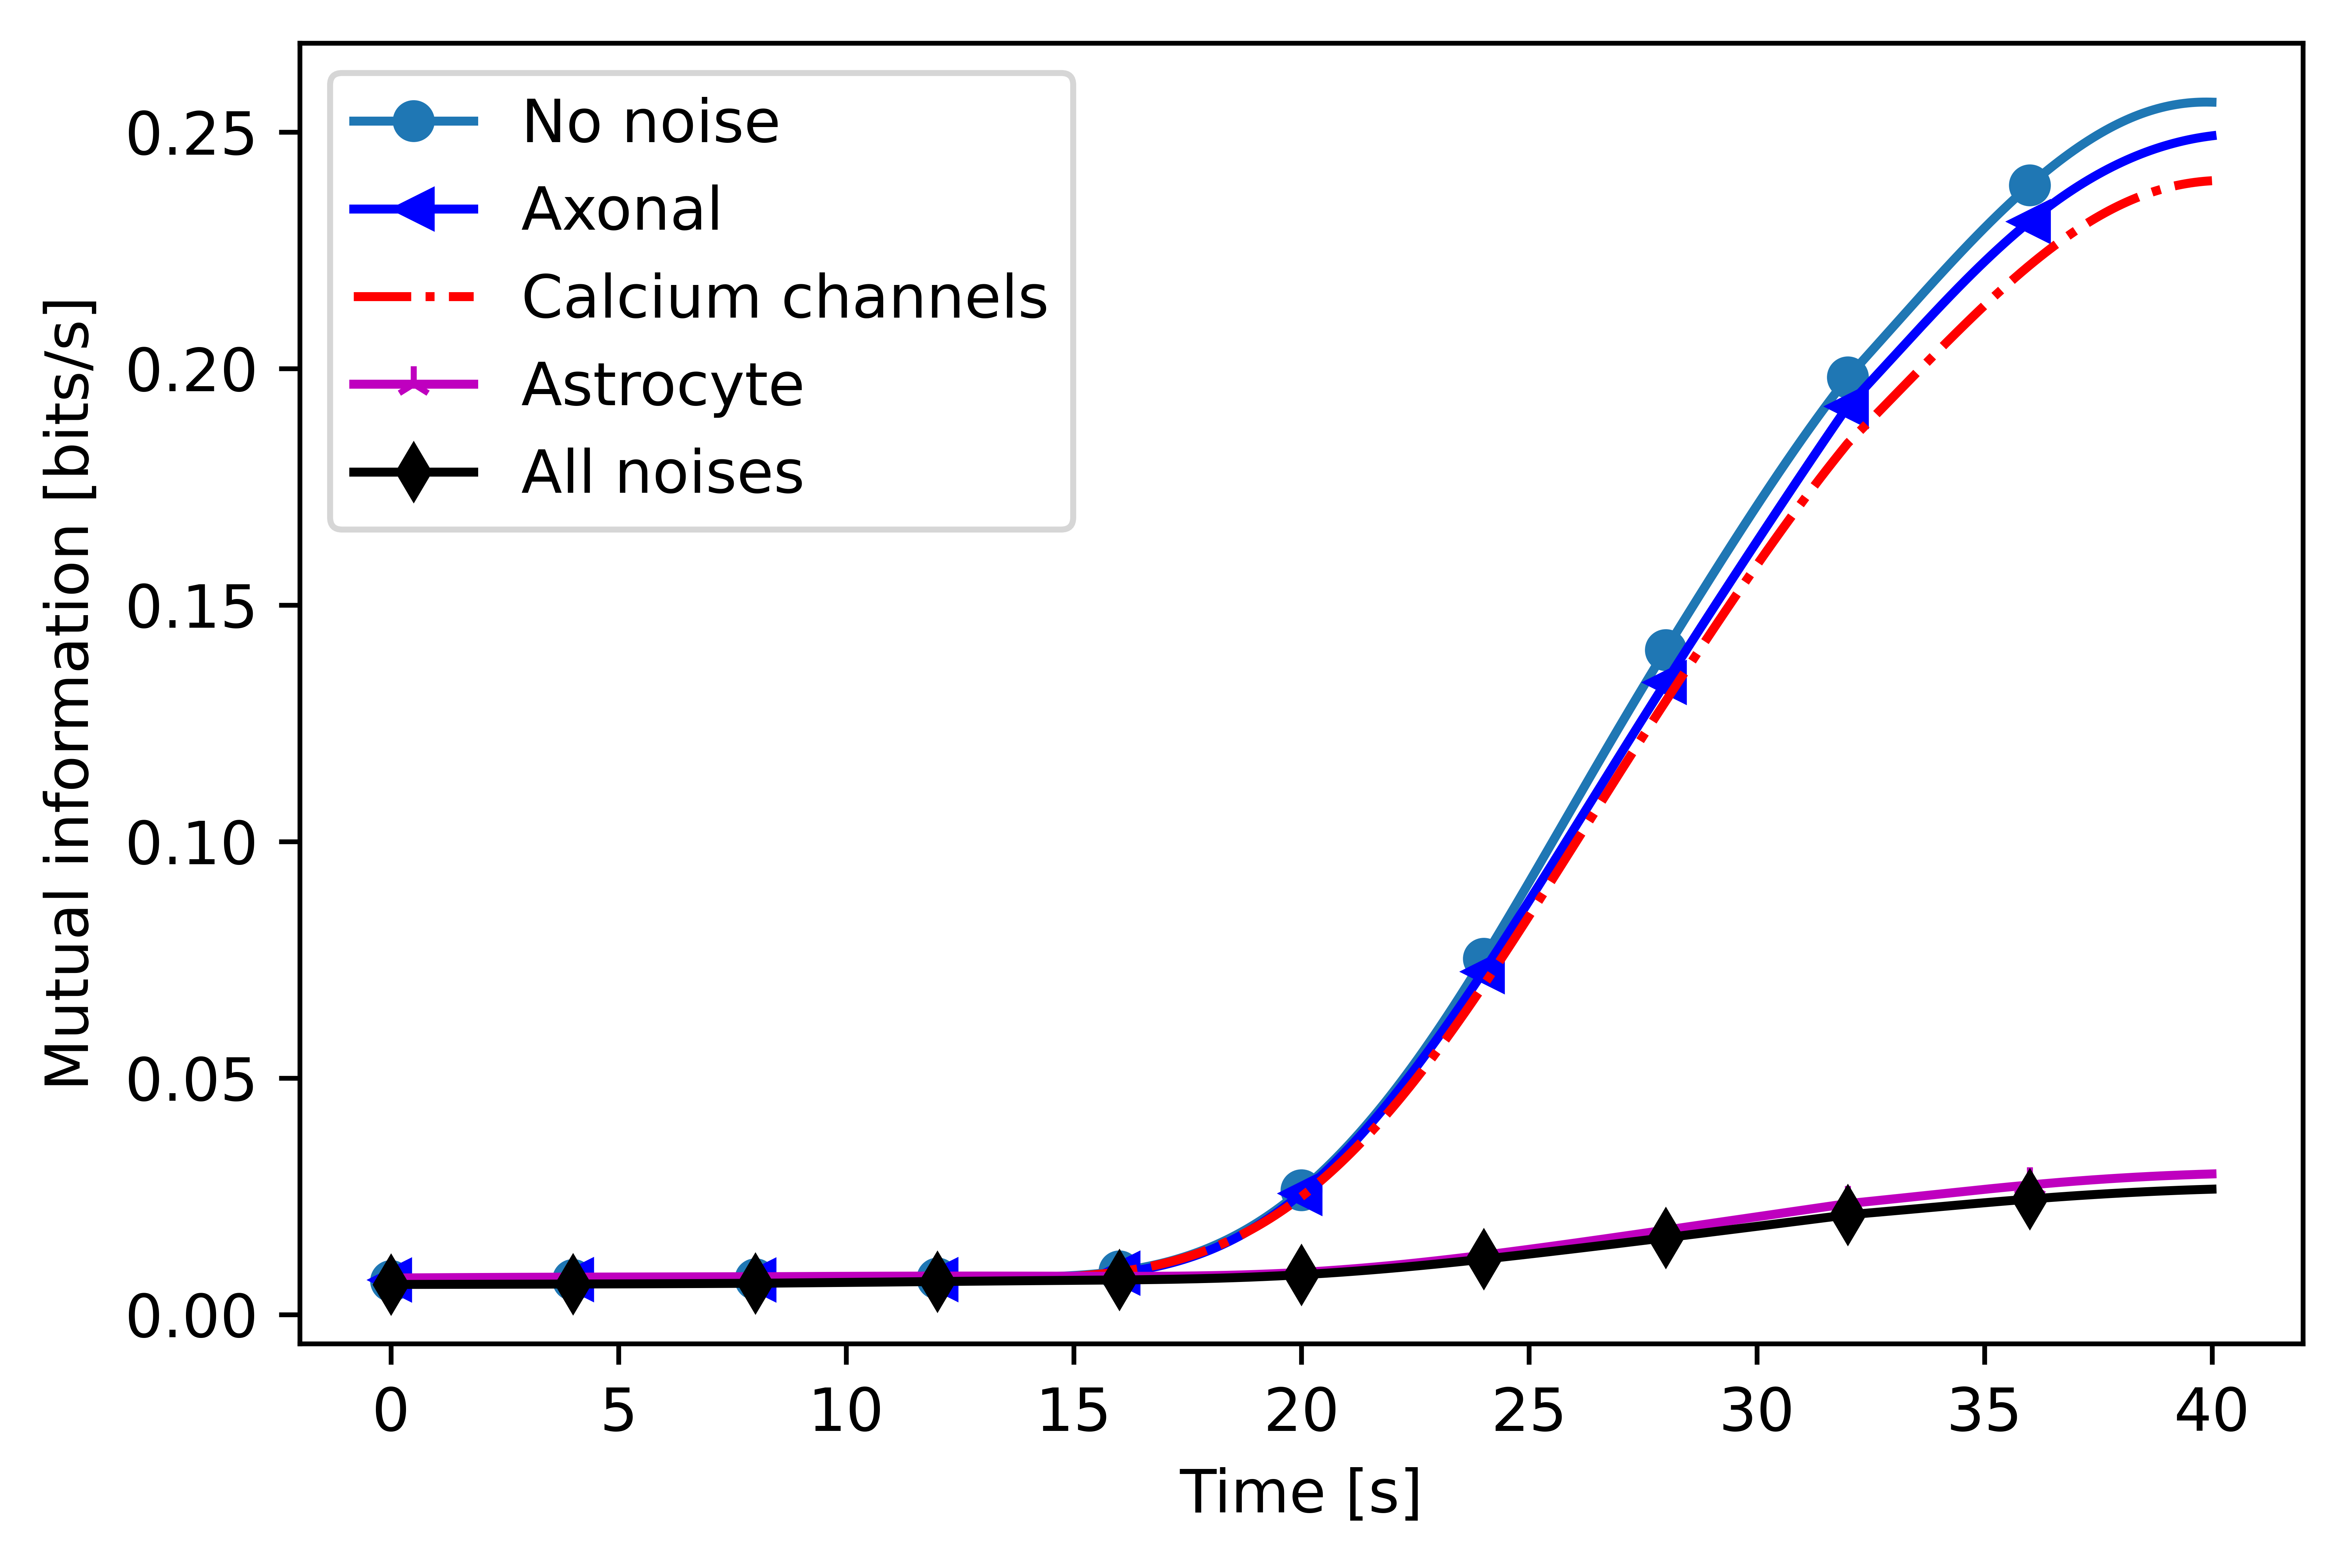

In [13]:
# Charts.1-2

importlib.reload(utils)
# formato lambda=20 "risultati/27_04/λ=20/valori/no_noise_lambda=20values"
# formato lambda=100 "risultati/29_04/MI_vs_time_lambda=100/no_noisevalues"
f1 = open("risultati/cr_data/confronto_λ=20/no_noise", "rb")
f2 = open("risultati/cr_data/confronto_λ=20/axonal", "rb")
f3 = open("risultati/cr_data/confronto_λ=20/VGCC", "rb")
f4 = open("risultati/cr_data/confronto_λ=20/Astro", "rb")
f5 = open("risultati/cr_data/confronto_λ=20/all_noise", "rb")
no_noise = pickle.load(f1)#.mutual_information
axonal = pickle.load(f2)#.mutual_information
VGCC = pickle.load(f3)#.mutual_information
Astro = pickle.load(f4)#.mutual_information
all_noise = pickle.load(f5)#.mutual_information
t_axis = np.arange(0, 40, 0.02e-3)


plt.rcParams["legend.loc"] = "upper left"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42
fig, ax = plt.subplots(dpi=1200)
ax.plot(t_axis, no_noise, "-o", label="No noise", markevery=200000)
ax.plot(t_axis, axonal, "-<b", label="Axonal", markevery=200000)
ax.plot(t_axis, VGCC, "-.r", label="Calcium channels", markevery=200000)
ax.plot(t_axis, Astro, "-2m", label="Astrocyte", markevery=200000)
ax.plot(t_axis, all_noise, "-dk", label="All noises", markevery=200000)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Mutual information [bits/s]")
ax.legend()
#plt.savefig('risultati/eps_figures/confronto_λ=20.eps', format='eps', bbox_inches = 'tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


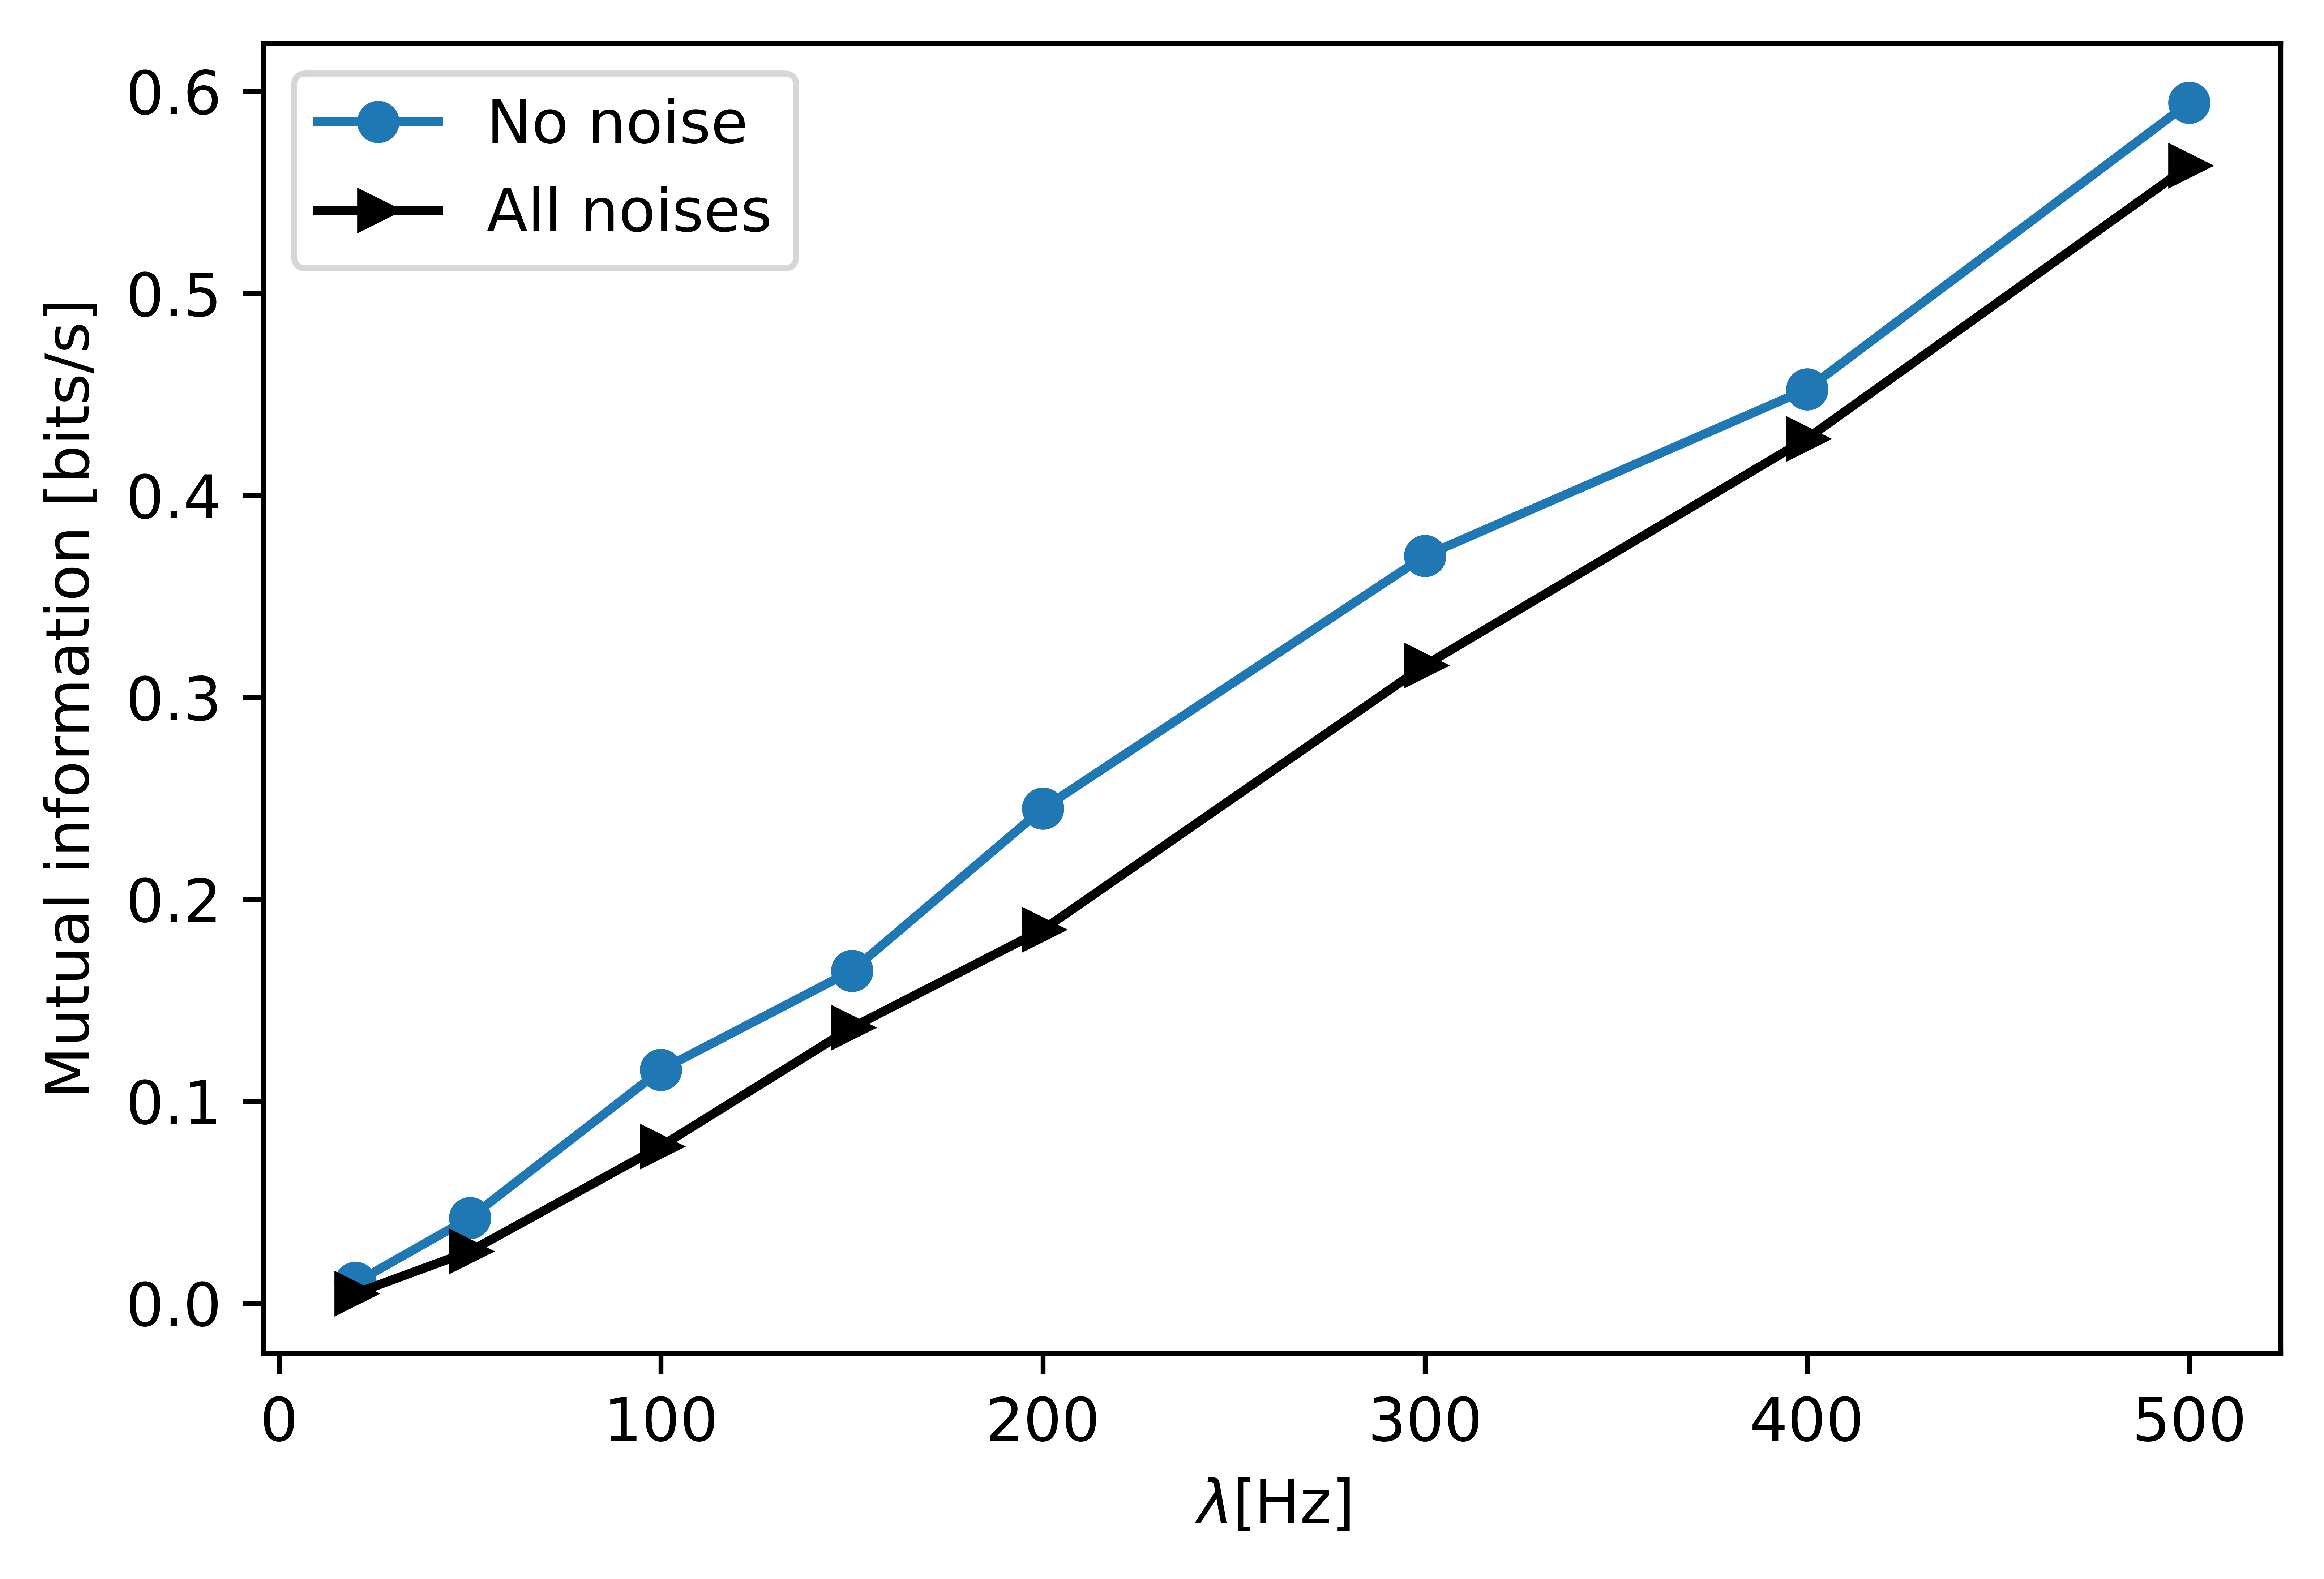

In [24]:
# Chart 3

plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42
setLambda = (20, 50, 100, 150, 200, 300, 400, 500)
f1 = open("risultati/cr_data/mi(λ)/no_noise", "rb")
f2 = open("risultati/cr_data/mi(λ)/all_noise", "rb")
no_noise = pickle.load(f1)
all_noise = pickle.load(f2)
plt.rcParams["legend.loc"] = "upper left"
fig, ax = plt.subplots(dpi=1200)
ax.plot(setLambda, no_noise, "-o", label="No noise")
ax.plot(setLambda, all_noise, "->k", label="All noises")
ax.legend()
ax.set_xlabel("$\lambda$[Hz]")
ax.set_ylabel("Mutual information [bits/s]")
plt.savefig('risultati/eps_figures/MI(λ).eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


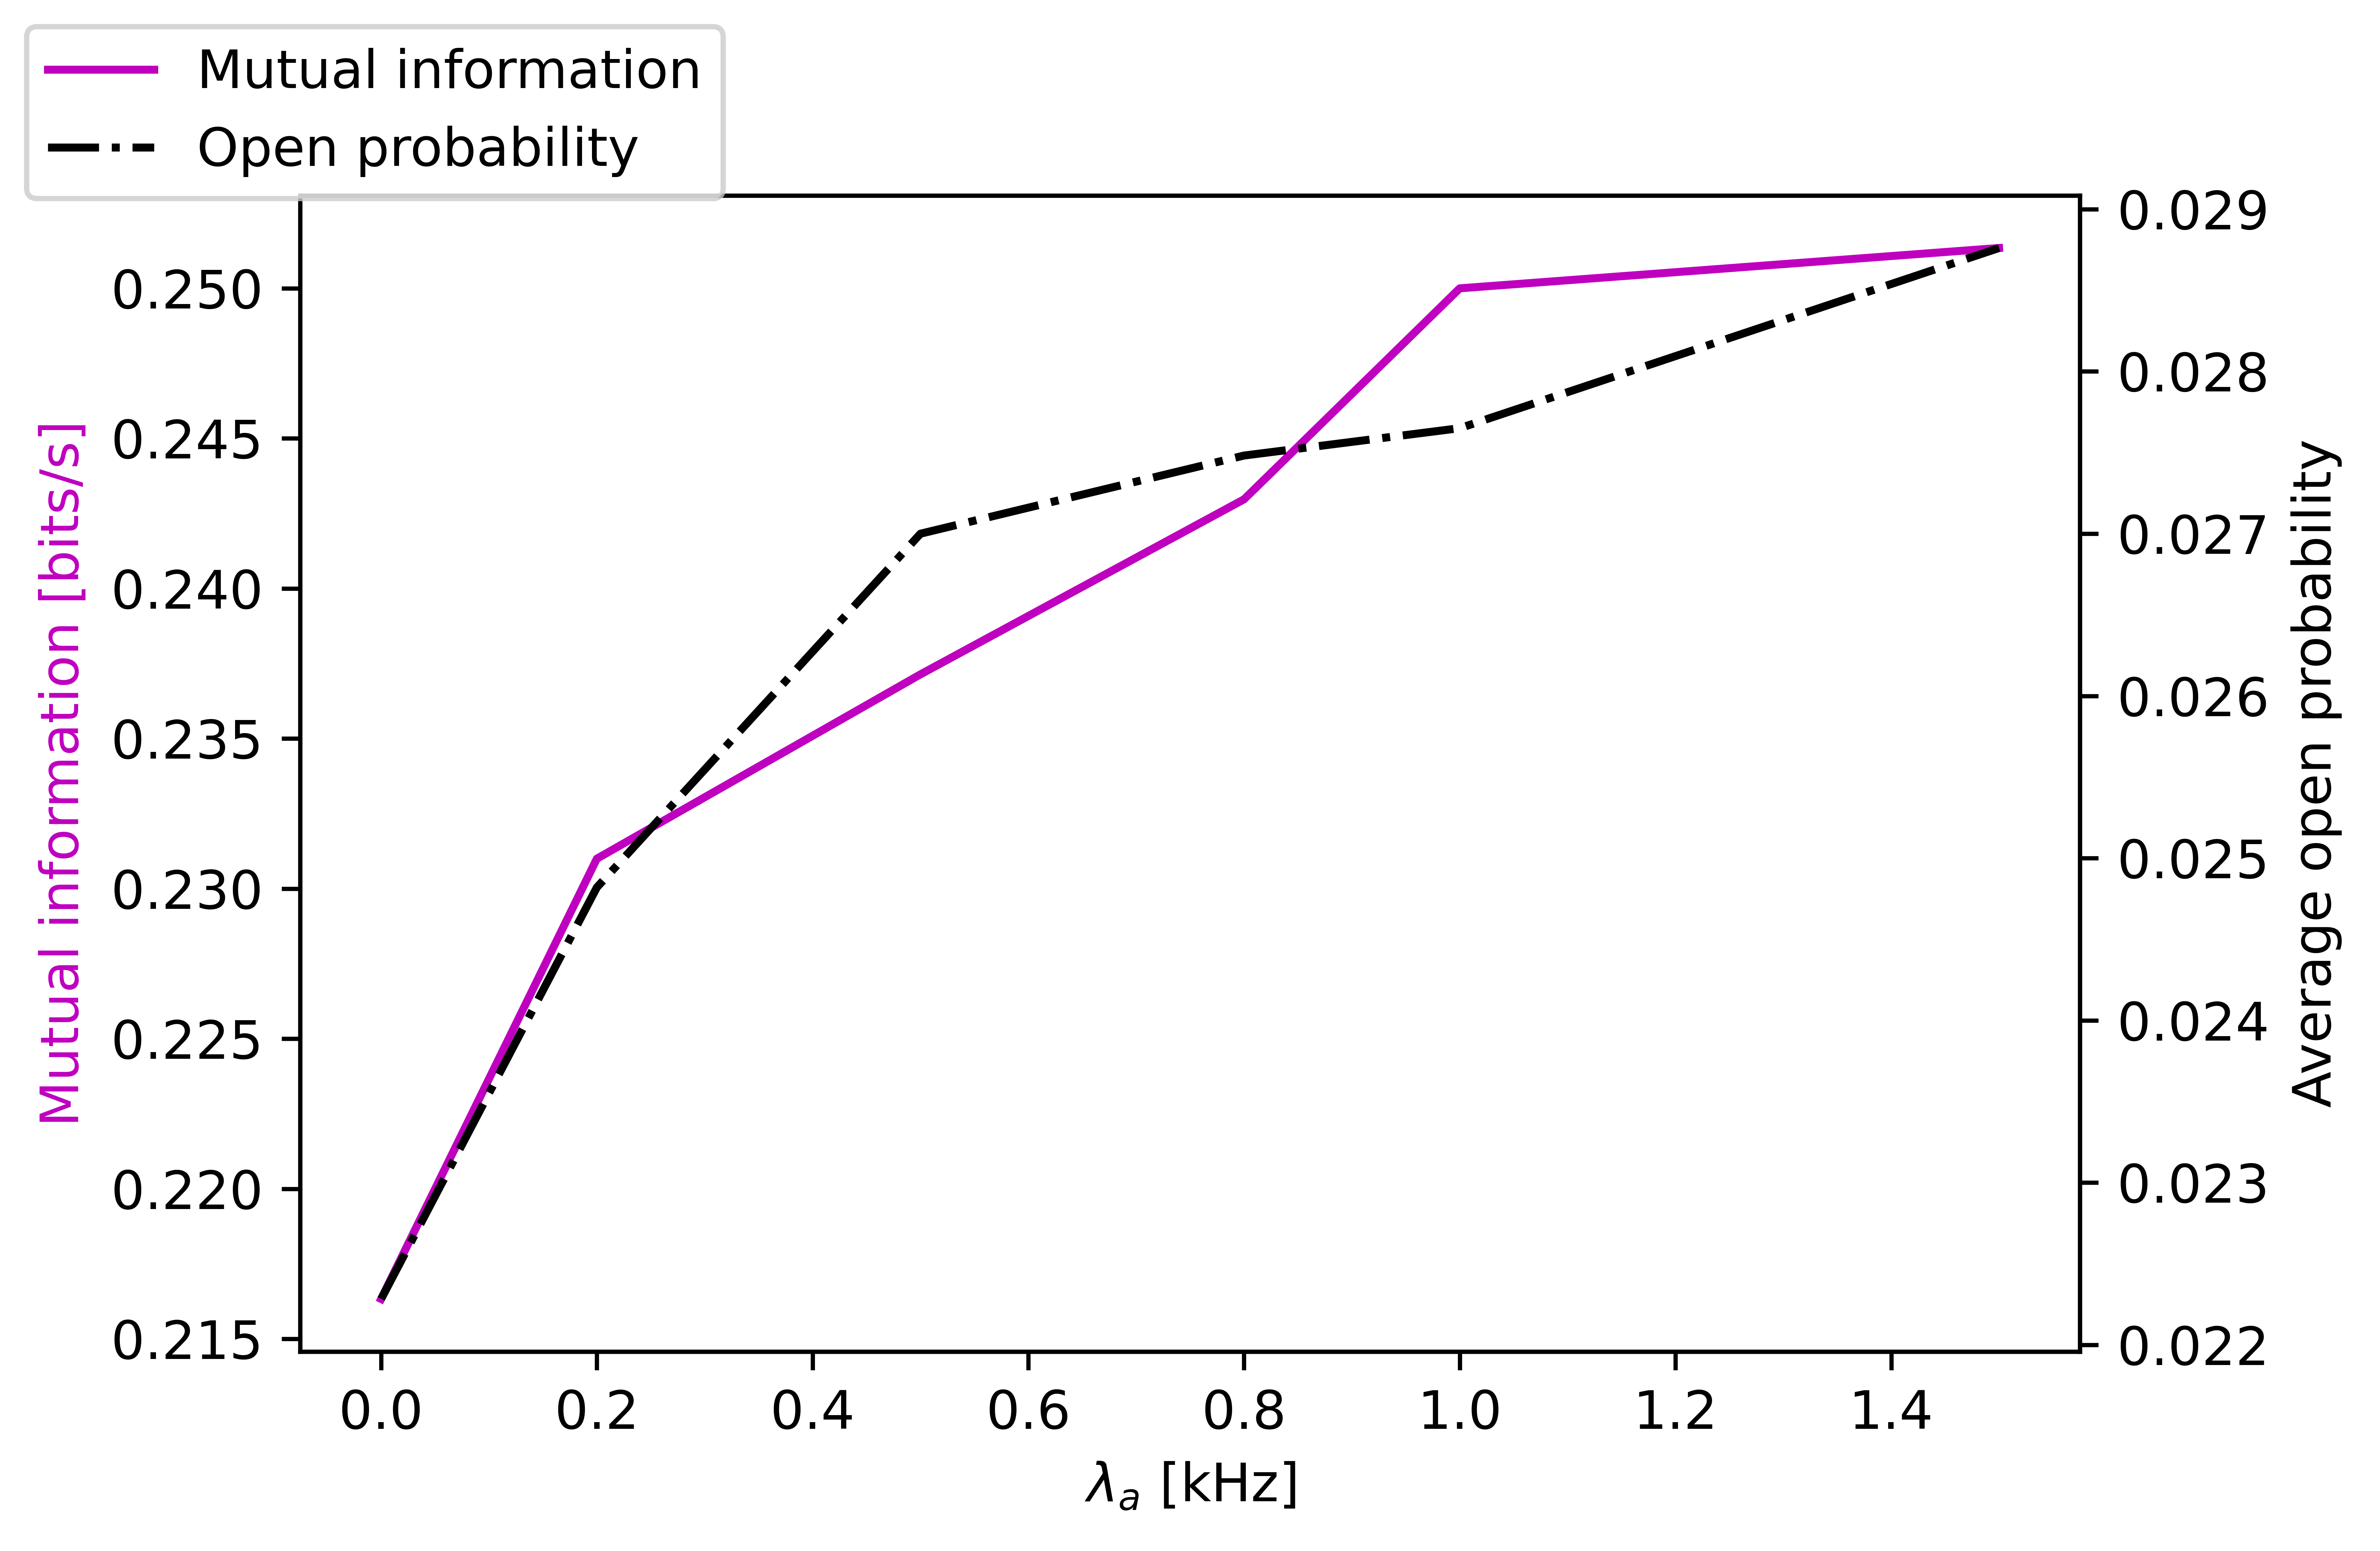

'f4 = open("risultati/28_04/o_p(lambda_Astro)", "wb")\nf3 = open("risultati/28_04/MI(lambda_Astro)", "wb")\nsetLambdaAstro = (0, 0.5, 1)\nfig, ax1 = plt.subplots(dpi=400)\nax1.set_xlabel("time (s)")\nax1.set_ylabel("average open probability")\nplt.rcParams["legend.loc"] = "upper right"\nfor lambda_astro in setLambdaAstro:\n    f2 = open("risultati/lambda_Astro="+str(lambda_astro)+"values", "rb")\n    o_p = pickle.load(f2).open_prob.value\n    o_p = utils.blur(o_p, [10, 1000, 10000, 100000])\n    if (lambda_astro == 1):\n        o_p += 4e-4\n    f1 = open("risultati/lambda_Astro="+str(lambda_astro)+"parameters", "rb")\n    params: neuron.SimulationParameters = pickle.load(f1)\n    time_axis = np.arange(0, params.simulation_time, params.time_step)\n    ax1.plot(time_axis, o_p, label="$\\lambda_a$="+str(lambda_astro)+"kHz")\nfig.legend()\nplt.show()'

In [21]:
#Chart 4

#Lambda astro experiments
"""importlib.reload(utils)
setLambdaAstro = (0, 0.2, 0.5, 0.8, 1, 1.5)#(2, 5, 10, 27)
MI = np.zeros(len(setLambdaAstro))
o_p = np.zeros(len(setLambdaAstro))
for i, lambda_ in enumerate(setLambdaAstro):
    noise.astro_release_rate = lambda_
    results = my_neuron.simulate(track_variables, save=True, save_each=2, name="lambda_Astro="+str(lambda_))

    MI[i] = np.mean(results.mutual_information.value)
    o_p[i] = np.mean(results.open_prob.value)
results = my_neuron.simulate(track_variables, save=False, save_each=2, name="lambda_Astro="+str(lambda_))
mi_no_noise = np.mean(results.mutual_information.value)
o_p_no_noise = np.mean(results.open_prob.value)"""

setLambdaAstro = (0, 0.2, 0.5, 0.8, 1, 1.5)
f1 = open("risultati/cr_data/mi_op_(λ_a)/MI", "rb")
MI = pickle.load(f1)
f2 = open("risultati/cr_data/mi_op_(λ_a)/op", "rb")
o_p = pickle.load(f2)

plt.rcParams["legend.loc"] = "upper left"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42
fig, ax1 = plt.subplots(dpi=1200)
ax1.plot(setLambdaAstro, MI, "-m", label="Mutual information")
ax1.set_ylabel("Mutual information [bits/s]")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax1.yaxis.label.set_color("m")
ax2.yaxis.label.set_color("k")
ax1.set_xlabel("$\lambda_a$ [kHz]")
ax2.plot(setLambdaAstro, o_p, "-.k", label="Open probability")
ax2.set_ylabel("Average open probability")
fig.legend()
plt.savefig('risultati/eps_figures/MI_and_op(λ_a).eps', format='eps', bbox_inches = 'tight')
plt.show()

In [ ]:
# gruppo di simulazioni

setLambda = [100]
axonal_noise["active"] = False
noise.VGCC = False
noise.Astro = False
for lambda_ in setLambda:
    simulation_parameters.lambda_ = lambda_
    results = my_neuron.simulate(track_variables, save=True, save_each=1, name="29_04/MI_vs_time_lambda=100/no_noise")
    plt.plot(results.mutual_information.value)
    
axonal_noise["active"] = True
noise.VGCC = False
noise.Astro = False
for lambda_ in setLambda:
    simulation_parameters.lambda_ = lambda_
    results = my_neuron.simulate(track_variables, save=True, save_each=1, name="29_04/MI_vs_time_lambda=100/axonal")
    plt.plot(results.mutual_information.value)

axonal_noise["active"] = False
noise.VGCC = True
noise.Astro = False
for lambda_ in setLambda:
    simulation_parameters.lambda_ = lambda_
    results = my_neuron.simulate(track_variables, save=True, save_each=1, name="29_04/MI_vs_time_lambda=100/VGCC")
    plt.plot(results.mutual_information.value)

axonal_noise["active"] = False
noise.VGCC = False
noise.Astro = True
for lambda_ in setLambda:
    simulation_parameters.lambda_ = lambda_
    results = my_neuron.simulate(track_variables, save=True, save_each=1, name="29_04/MI_vs_time_lambda=100/Astro")
    plt.plot(results.mutual_information.value)

axonal_noise["active"] = True
noise.VGCC = True
noise.Astro = True
for lambda_ in setLambda:
    simulation_parameters.lambda_ = lambda_
    results = my_neuron.simulate(track_variables, save=True, save_each=1, name="29_04/MI_vs_time_lambda=100/all_noise")
    plt.plot(results.mutual_information.value)
